In [1]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#import nltk
import pandas as pd
import numpy as np
import re
from nltk.corpus import wordnet as wn
import matplotlib as mpl
mpl.use('agg')
%matplotlib inline
import matplotlib.pyplot as plt
import operator

In [3]:
data = pd.read_csv('tweets-dataset.csv')

In [4]:
#Data Cleaning
for i in range(len(data)):
    data['Sentence'][i] = data['Sentence'][i].lower()
    data['Sentence'][i] = re.sub(r'[@#]\S*','',data['Sentence'][i] ) #Removing usernames and hashtags
    data['Sentence'][i] = re.sub(r'\n*','',data['Sentence'][i] ) #Removing newlines
    data['Sentence'][i] = re.sub(r'http\S*','',data['Sentence'][i] ) #Removing hyperlinks
    data['Sentence'][i] = re.sub(r'pic\.\S*','',data['Sentence'][i] ) #Removing links to photos in twitter
    data['Sentence'][i] = re.sub(r':[|)(DPpoOvV3]','',data['Sentence'][i] ) #Removing emoticons
    data['Sentence'][i] = re.sub(r'[!$%&?_;/<>()"\.:,-\\]','',data['Sentence'][i] ) #removing special characters

In [5]:
print('ASSIGNMENT - 1')
print('NAME: Kavita Vaishnaw')
print('ROLL NO.: 17110073')
print('\n\n')

ASSIGNMENT - 1
NAME: Kavita Vaishnaw
ROLL NO.: 17110073





In [6]:
# Creating tokens
tokens=[]
for i in range(len(data)):
    tokens = tokens + nltk.word_tokenize(data['Sentence'][i])
print('Number of Tokens:', len(tokens))

Number of Tokens: 288377


In [7]:
#Creating types from tokens
tokens_uniq = np.array(tokens)
tokens_uniq=np.unique(tokens_uniq)

In [8]:
types = list(tokens_uniq)
print('Number of Types:', len(types))

Number of Types: 32474


In [9]:
# Computing ttr
ttr = len(types)/len(tokens)
print('Type-Token Ratio: '+ str(ttr))

Type-Token Ratio: 0.11260953543451802


In [10]:
# computing frequency of all tokens
counts = [(w, tokens.count(w)) for w in types]

In [11]:
y_val = [len(x[0]) for x in counts]
x_val = [x[1] for x in counts]

Checking if Zipf's Law for Length holds True



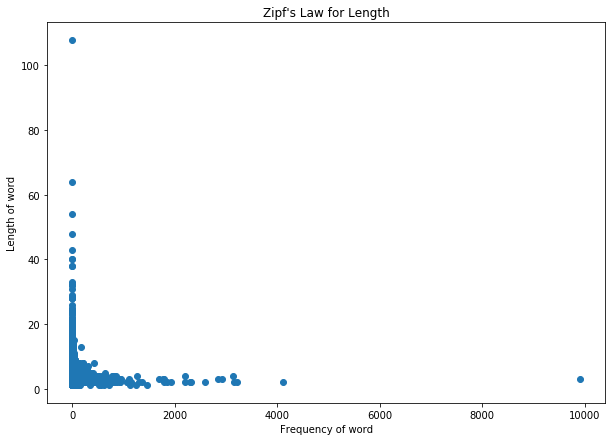

In [12]:
# plotting zipf's law of length
print('Checking if Zipf\'s Law for Length holds True\n')
plt.figure(figsize = (10,7))
plt.scatter(x_val, y_val)
plt.title('Zipf\'s Law for Length')
plt.xlabel('Frequency of word')
plt.ylabel('Length of word')
plt.show()

In [13]:
# sort counts according to frquency in descending order
counts.sort(key = operator.itemgetter(1), reverse = True)

In [14]:
# make a dictionary with key as word and value as its frequency
dict_counts = dict(counts)

In [15]:
# words randomly chosen for zipf's law of meaning
words_chosen = ['league', 'trend','batting', 'girls', 'president', 'let', 'old', 'watching', 'days', 'miss', 'even', 'watch', 'show', 'think', 'last', 'free']
#len(words_chosen)=16

In [16]:
x_val = [np.sqrt(dict_counts[word]) for word in words_chosen]
#x_val

In [17]:
y_val = [len(wn.synsets(word)) for word in words_chosen]
#y_val


Checking if Zipf's Law for Meanings holds True



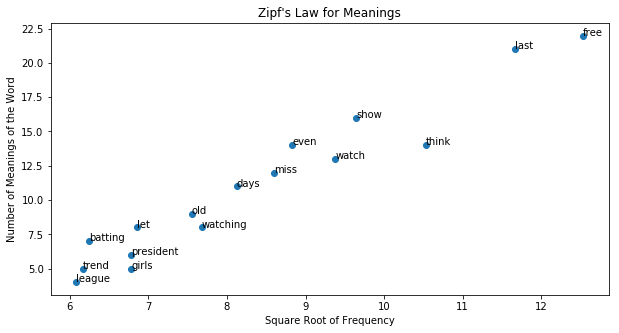

In [18]:
print('Checking if Zipf\'s Law for Meanings holds True\n')
plt.figure(figsize = (10,5))
plt.scatter(x_val, y_val)
plt.title('Zipf\'s Law for Meanings')
plt.ylabel('Number of Meanings of the Word')
plt.xlabel('Square Root of Frequency')
for i, txt in enumerate(words_chosen):
    plt.annotate(txt, (x_val[i], y_val[i]))
plt.show()

In [19]:
# plotting heaps' law
corpus_size=[]
vocab_size=[]
i = 0
vocab = set()
for word in tokens:
    vocab.add(word)
    i += 1
    corpus_size.append(i)
    vocab_size.append(len(vocab))


Plotting Heaps' Law



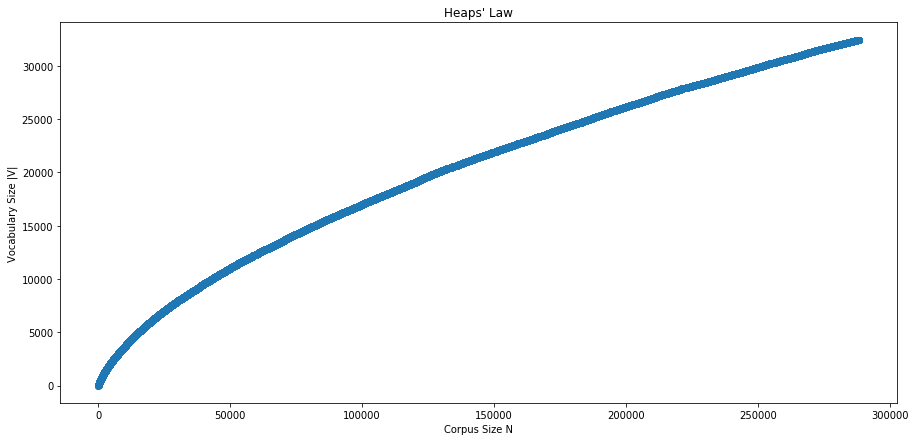

In [20]:
print('Plotting Heaps\' Law\n')
plt.figure(figsize = (15,7))
plt.scatter(corpus_size, vocab_size)
plt.title('Heaps\' Law')
plt.ylabel('Vocabulary Size |V|')
plt.xlabel('Corpus Size N')
plt.show()